In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score,recall_score,precision_score,make_scorer
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from sklearn.neural_network import MLPClassifier  # For ANN
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Conv1D, Flatten, Dense, MaxPooling1D

In [ ]:
adults_data = pd.read_csv("/content/drive/MyDrive/ASD/csv_result-Autism-Adult-Data.csv")

In [ ]:
print(f'Shape of dataframe is: {adults_data.shape}')

Shape of dataframe is: (704, 22)


In [ ]:
adults_data

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,700,0,1,0,1,1,0,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,701,1,0,0,0,0,0,0,1,0,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,702,1,0,1,1,1,0,1,1,0,...,f,?,no,no,Russia,no,7,18 and more,?,YES
702,703,1,0,0,1,1,0,1,0,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO


In [ ]:
pd.DataFrame(adults_data.dtypes,columns = ["Data Type"])

,Data Type
id,int64
A1_Score,int64
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64


In [ ]:
adults_data.isna().sum()

,0
id,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [ ]:
adults_data['ethnicity'] = adults_data['ethnicity'].replace('?', np.nan)
adults_data['relation'] =  adults_data['relation'].replace('?', np.nan)
adults_data['age'] = adults_data['age'].replace('?', np.nan)

for column in ['ethnicity', 'relation']:
  most_frequent_value = adults_data[column].mode()[0]
  adults_data[column] = adults_data[column].fillna(most_frequent_value)

In [ ]:
for col in adults_data.select_dtypes('O').columns:
    print("-------------------------------")
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{adults_data[col].unique()}\n\n')

-------------------------------
Column name: age

Unique values:
['26' '24' '27' '35' '40' '36' '17' '64' '29' '33' '18' '31' '30' '34'
 '38' '42' '43' '48' '37' '55' '50' '53' '20' '28' '21' '383' '47' '32'
 '44' nan '19' '58' '45' '22' '39' '25' '23' '54' '60' '41' '46' '56' '61'
 '59' '52' '49' '51']


-------------------------------
Column name: gender

Unique values:
['f' 'm']


-------------------------------
Column name: ethnicity

Unique values:
['White-European' 'Latino' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']


-------------------------------
Column name: jundice

Unique values:
['no' 'yes']


-------------------------------
Column name: austim

Unique values:
['no' 'yes']


-------------------------------
Column name: contry_of_res

Unique values:
['United States' 'Brazil' 'Spain' 'Egypt' 'New Zealand' 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland' 'United Arab Emirates'
 'Afghanistan' 'Lebanon' 'Unit

In [ ]:
pd.DataFrame(adults_data.isnull().sum(), columns=["Missing Values"]).style.bar(color = "#84A9AC")

,Missing Values
id,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [ ]:
# Assuming 'age' is the attribute with null values
adults_data.dropna(subset=['age'], inplace=True)

# Alternatively, you can fill with the mean/median/mode if you prefer:
# Convert 'age' column to numeric, handling errors by coercing them to NaN
adults_data['age'] = pd.to_numeric(adults_data['age'], errors='coerce')
# Now calculate the mean and fill NaN values
adults_data['age'].fillna(adults_data['age'].mean(), inplace=True)

# Check for remaining null values
print(adults_data.isnull().sum())

id                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


<ipython-input-8-91161fa363d9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adults_data['age'].fillna(adults_data['age'].mean(), inplace=True)


In [ ]:
adults_data.drop(['age_desc'], axis = 1, inplace = True)

In [ ]:
adults_data= adults_data.drop(columns=['result'])

In [ ]:
X = adults_data.drop(['Class/ASD', 'relation'], axis=1)
y = adults_data['Class/ASD']

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode target and features
le=LabelEncoder()
y = le.fit_transform(y)
X['gender'] = le.fit_transform(X['gender'])
X['jundice'] = le.fit_transform(X['jundice'])
X['austim'] = le.fit_transform(X['austim'])
X['contry_of_res'] = le.fit_transform(X['contry_of_res'])
X['ethnicity'] = le.fit_transform(X['ethnicity'])
#X['result'] = le.fit_transform(X['result'])
X['used_app_before'] = le.fit_transform(X['used_app_before'])



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
scaler = MinMaxScaler()
X[['age']] = scaler.fit_transform(X[['age']])
X

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before
0,1,1,1,1,1,0,0,1,1,0,0,0.024590,0,9,0,0,64,0
1,2,1,1,0,1,0,0,0,1,0,1,0.019126,1,3,0,1,13,0
2,3,1,1,0,1,1,0,1,1,1,1,0.027322,1,3,1,1,56,0
3,4,1,1,0,1,0,0,1,1,0,1,0.049180,0,9,0,1,64,0
4,5,1,0,0,0,0,0,0,1,0,0,0.062842,0,9,0,0,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,700,0,1,0,1,1,0,1,1,1,1,0.021858,0,9,0,0,51,0
700,701,1,0,0,0,0,0,0,1,0,1,0.046448,1,2,0,0,40,0
701,702,1,0,1,1,1,0,1,1,0,1,0.019126,0,9,0,0,51,0
702,703,1,0,0,1,1,0,1,0,1,1,0.049180,1,7,0,0,47,0


In [ ]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(844, 18)
(844,)
------------Test Set------------------
(141, 18)
(141,)


In [ ]:

def train_model(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    matrix=confusion_matrix(y_test,y_pred)
    print("Confusion Matrix is: ")
    print(matrix)
    print("\n\nScore Table is: ")
    score_df = pd.DataFrame([[accuracy, precision, recall, f1]],
                            columns=["accuracy", "precision", "recall", "f1"])

    return score_df

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
result=train_model(model,X_train, y_train, X_test, y_test)
result.index=["Logistic Regression"]
result

Confusion Matrix is: 
[[77 14]
 [ 4 46]]


Score Table is: 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,accuracy,precision,recall,f1
Logistic Regression,0.87234,0.766667,0.92,0.836364


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Limit depth and number of trees
model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)

# Train the model and evaluate
result = train_model(model, X_train, y_train, X_test, y_test)

# Cross-validate
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validated accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std():.2f})")

# Evaluate the final model on the test set
print(result)

Confusion Matrix is: 
[[86  5]
 [ 2 48]]


Score Table is: 
Cross-validated accuracy: 0.93 (+/- 0.02)
   accuracy  precision  recall        f1
0  0.950355    0.90566    0.96  0.932039


In [ ]:
from sklearn.svm import SVC
model = SVC()
svm = train_model(model, X_train, y_train, X_test, y_test)
svm.index = ["SVM Classifier"]
result = pd.concat([result, svm])
result

Confusion Matrix is: 
[[78 13]
 [40 10]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,0.872340,0.766667,0.92,0.836364
SVM Classifier,0.624113,0.434783,0.20,0.273973


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
rfc = train_model(model, X_train, y_train, X_test, y_test)
rfc.index = ["Random Forest Classifier"]
result = pd.concat([result, rfc])
result

Confusion Matrix is: 
[[85  6]
 [ 2 48]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,0.872340,0.766667,0.92,0.836364
SVM Classifier,0.624113,0.434783,0.20,0.273973
Random Forest Classifier,0.943262,0.888889,0.96,0.923077


In [ ]:
# XGBoost Classifier
from xgboost import XGBClassifier
model = XGBClassifier()
xg = train_model(model, X_train, y_train, X_test, y_test)
xg.index = ["XGBoost Classifier"]
result = pd.concat([result, xg])
result

Confusion Matrix is: 
[[88  3]
 [ 1 49]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,0.872340,0.766667,0.92,0.836364
SVM Classifier,0.624113,0.434783,0.20,0.273973
Random Forest Classifier,0.943262,0.888889,0.96,0.923077
XGBoost Classifier,0.971631,0.942308,0.98,0.960784


In [ ]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
gb = train_model(model, X_train, y_train, X_test, y_test)
gb.index = ["Gradient Boosting Classifier"]
result = pd.concat([result, gb])
result

Confusion Matrix is: 
[[87  4]
 [ 0 50]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,0.872340,0.766667,0.92,0.836364
SVM Classifier,0.624113,0.434783,0.20,0.273973
Random Forest Classifier,0.943262,0.888889,0.96,0.923077
XGBoost Classifier,0.971631,0.942308,0.98,0.960784
Gradient Boosting Classifier,0.971631,0.925926,1.00,0.961538


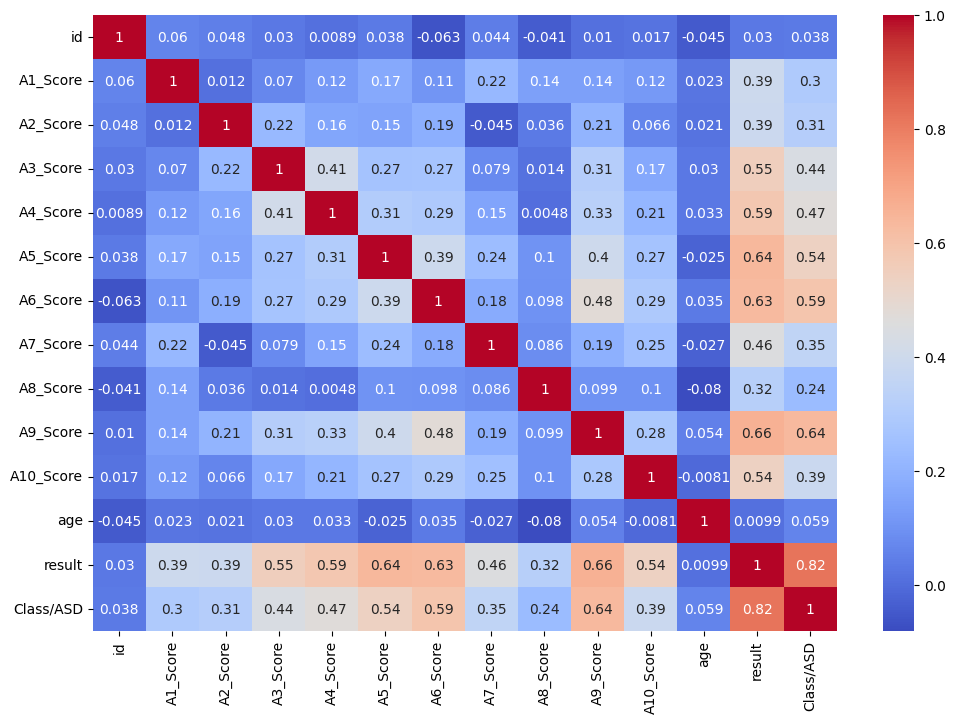

In [ ]:
adults_data['Class/ASD'] = adults_data['Class/ASD'].apply(lambda x: 1 if x == 'YES' else 0)

# Select only numeric features for correlation analysis
numeric_features = adults_data.select_dtypes(include=np.number).columns
correlation_matrix = adults_data[numeric_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df)

            Feature  Importance
18           result    0.523648
9          A9_Score    0.108602
5          A5_Score    0.094310
6          A6_Score    0.068299
4          A4_Score    0.028441
10        A10_Score    0.028000
3          A3_Score    0.023243
0                id    0.020612
12           gender    0.017224
16    contry_of_res    0.015981
13        ethnicity    0.015258
1          A1_Score    0.014783
11              age    0.011093
7          A7_Score    0.010593
8          A8_Score    0.008379
2          A2_Score    0.008211
15           austim    0.001909
14          jundice    0.001109
17  used_app_before    0.000302


In [ ]:
X_encoded = X.copy()
for column in X_encoded.columns:
    if X_encoded[column].dtype == 'object':
        le = LabelEncoder()
        X_encoded[column] = le.fit_transform(X_encoded[column])

# Perform chi-squared test
chi2_values, p_values = chi2(X_encoded, y)

# Create a DataFrame with chi2 and p-values
chi2_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Chi2 Value': chi2_values,
    'P-Value': p_values
}).sort_values(by='Chi2 Value', ascending=False)

print(chi2_df)

            Feature  Chi2 Value        P-Value
18           result  605.564647  1.031462e-133
9          A9_Score  191.216990   1.724618e-43
6          A6_Score  175.723459   4.161249e-40
0                id  115.253123   6.926699e-27
5          A5_Score  101.905134   5.824536e-24
4          A4_Score   77.691385   1.204656e-18
3          A3_Score   73.650960   9.322651e-18
7          A7_Score   50.800611   1.022419e-12
10        A10_Score   44.650255   2.355670e-11
2          A2_Score   37.418168   9.532995e-10
13        ethnicity   34.933437   3.411713e-09
15           austim   19.116004   1.230091e-05
1          A1_Score   17.008821   3.720656e-05
8          A8_Score   13.594396   2.268617e-04
14          jundice    6.540809   1.054274e-02
12           gender    2.183245   1.395200e-01
16    contry_of_res    1.695913   1.928234e-01
17  used_app_before    1.325815   2.495512e-01
11              age    0.144048   7.042891e-01


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
dt = train_model(model, X_train, y_train, X_test, y_test)
dt.index = ["Decision Tree Classifier"]
result = pd.concat([result, dt])
result

Confusion Matrix is: 
[[83  8]
 [ 6 44]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,0.872340,0.766667,0.92,0.836364
SVM Classifier,0.624113,0.434783,0.20,0.273973
Random Forest Classifier,0.943262,0.888889,0.96,0.923077
XGBoost Classifier,0.971631,0.942308,0.98,0.960784
Gradient Boosting Classifier,0.971631,0.925926,1.00,0.961538
Decision Tree Classifier,0.900709,0.846154,0.88,0.862745


In [ ]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
adb = train_model(model, X_train, y_train, X_test, y_test)
adb.index = ["Ada Boost Classifier"]
result = pd.concat([result, adb])
result

Confusion Matrix is: 
[[85  6]
 [ 0 50]]


Score Table is: 


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,accuracy,precision,recall,f1
Logistic Regression,0.872340,0.766667,0.92,0.836364
SVM Classifier,0.624113,0.434783,0.20,0.273973
Random Forest Classifier,0.943262,0.888889,0.96,0.923077
XGBoost Classifier,0.971631,0.942308,0.98,0.960784
Gradient Boosting Classifier,0.971631,0.925926,1.00,0.961538
Decision Tree Classifier,0.900709,0.846154,0.88,0.862745
Ada Boost Classifier,0.957447,0.892857,1.00,0.943396


# ANN+Random Forest


In [ ]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [ ]:
# Best Random Forest Model
best_rf = rf_grid.best_estimator_
rf_train_predictions = best_rf.predict_proba(X_train)[:, 1].reshape(-1, 1)
rf_test_predictions = best_rf.predict_proba(X_test)[:, 1].reshape(-1, 1)

In [ ]:
# Step 2: Concatenate RF predictions with original features
X_train_hybrid = np.concatenate((X_train, rf_train_predictions), axis=1)
X_test_hybrid = np.concatenate((X_test, rf_test_predictions), axis=1)

In [ ]:
# Step 3: Optimize ANN Model
ann_params = {
    'hidden_layer_sizes': [(64, 32), (128, 64, 32)],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [300, 500]
}
ann_grid = GridSearchCV(MLPClassifier(random_state=42), ann_params, cv=5, scoring='accuracy')
ann_grid.fit(X_train_hybrid, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'hidden_layer_sizes': [(64, 32), (128, 64, 32)],
                         'learning_rate_init': [0.001, 0.01],
                         'max_iter': [300, 500]},
             scoring='accuracy')

In [ ]:
# Best ANN Model
best_ann = ann_grid.best_estimator_

In [ ]:
# Step 4: Weighted Blending of RF and ANN predictions
rf_blend_weight = 0.5  # You can adjust this weight as needed

In [ ]:
# Train and test predictions
rf_test_proba = best_rf.predict_proba(X_test)[:, 1]
ann_test_proba = best_ann.predict_proba(X_test_hybrid)[:, 1]

In [ ]:
# Weighted average of both predictions
final_predictions = (rf_blend_weight * rf_test_proba + (1 - rf_blend_weight) * ann_test_proba) >= 0.5

In [ ]:
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test,  final_predictions)
    precision = precision_score(y_test,  final_predictions)
    recall = recall_score(y_test, final_predictions)
    f1 = f1_score(y_test, final_predictions)
    matrix = confusion_matrix(y_test,  final_predictions)

    print("Confusion Matrix is: ")
    print(matrix)
    print("\n\nScore Table is: ")
    score_df = pd.DataFrame([[accuracy, precision, recall, f1]],
                            columns=["accuracy", "precision", "recall", "f1"])

    return score_df

# Using train_model to evaluate Random Forest + ANN Hybrid Model
result = train_model(best_ann, X_train_hybrid, y_train, X_test_hybrid, y_test)
result.index = ["Random Forest + ANN Hybrid Model"]
print(result)

Confusion Matrix is: 
[[83  8]
 [ 4 46]]


Score Table is: 
                                  accuracy  precision  recall        f1
Random Forest + ANN Hybrid Model  0.914894   0.851852    0.92  0.884615


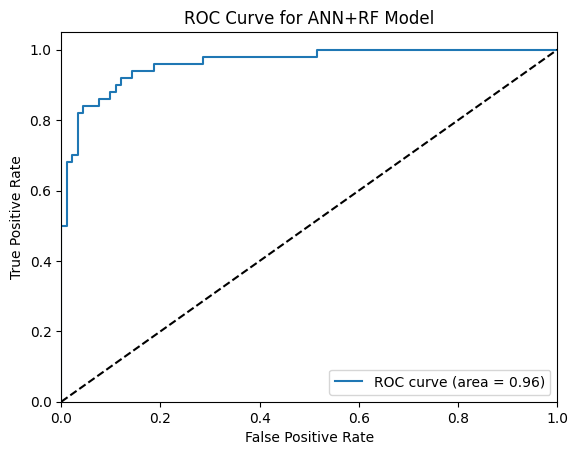

In [ ]:
# prompt: Roc curve for this ann+rf model with model name init

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'best_ann' and 'X_test_hybrid' are defined from the previous code
y_pred_proba = best_ann.predict_proba(X_test_hybrid)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ANN+RF Model') # Updated title
plt.legend(loc="lower right")
plt.show()

#XGBoost + Logistic Regression

In [ ]:
# Initialize individual models
xgb_model = XGBClassifier(random_state=42)
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Create the stacking ensemble
stacked_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('log_reg', log_reg_model)
    ],
    final_estimator=LogisticRegression(),  # Logistic Regression as the meta-learner
    cv=5  # Cross-validation for stability
)

In [ ]:
# Train and evaluate the stacked model
result = train_model(stacked_model, X_train, y_train, X_test, y_test)
result.index = ["XGBoost + Logistic Regression Hybrid Model"]
print(result)

Confusion Matrix is: 
[[83  8]
 [ 4 46]]


Score Table is: 
                                            accuracy  precision  recall  \
XGBoost + Logistic Regression Hybrid Model  0.914894   0.851852    0.92   

                                                  f1  
XGBoost + Logistic Regression Hybrid Model  0.884615  


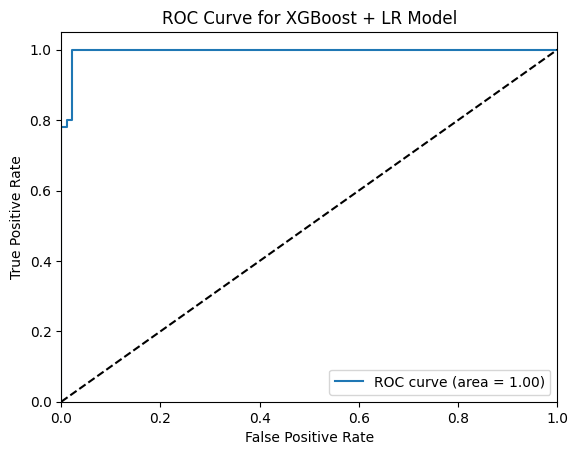

In [ ]:
# prompt: roc curve model for this xgboost+lr model with model name in it

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'stacked_model' and 'X_test' are defined from the previous code
y_pred_proba = stacked_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost + LR Model') # Updated title
plt.legend(loc="lower right")
plt.show()

#3. Autoencoder (ANN) + K-Nearest Neighbors (KNN):

In [ ]:
# Enhanced Autoencoder
encoding_dim = 16
autoencoder = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(encoding_dim, activation='tanh'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(X_train.shape[1], activation='sigmoid')
])

In [ ]:
# Compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
# Step 2: Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=1)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 9831.6924 - val_loss: 8760.7744
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9506.5488 - val_loss: 8754.3672
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10431.3809 - val_loss: 8752.1143
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9637.6533 - val_loss: 8751.2393
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9947.8594 - val_loss: 8750.9023
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9715.9121 - val_loss: 8750.7607
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10009.3633 - val_loss: 8750.6914
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9540.6895 - val_loss: 8750.6504
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10206.5703 - val_loss: 8750.6260
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9995.0967 - val_loss: 8750.6094
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10153.7383 - val_loss: 8750.5967
Epoc

In [ ]:
# Step 3: Extract the encoder part
encoder = Sequential([autoencoder.layers[0], autoencoder.layers[1], autoencoder.layers[2]])
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Step 4: Scale encoded features for KNN
scaler = MinMaxScaler()
X_train_encoded = scaler.fit_transform(X_train_encoded)
X_test_encoded = scaler.transform(X_test_encoded)

In [ ]:
# Step 5: Train and evaluate KNN on encoded features
knn = KNeighborsClassifier(n_neighbors=5)  # you can adjust n_neighbors if needed
knn.fit(X_train_encoded, y_train)
y_pred = knn.predict(X_test_encoded)

In [ ]:
# Fine-tuning KNN with GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_encoded, y_train)
best_knn = grid.best_estimator_


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# Step 6: Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
# Modify step 6 to use the fine-tuned KNN model
y_pred = best_knn.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)

Confusion Matrix:
 [[87  4]
 [45  5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.96      0.78        91
           1       0.56      0.10      0.17        50

    accuracy                           0.65       141
   macro avg       0.61      0.53      0.47       141
weighted avg       0.62      0.65      0.56       141


Accuracy: 0.6524822695035462


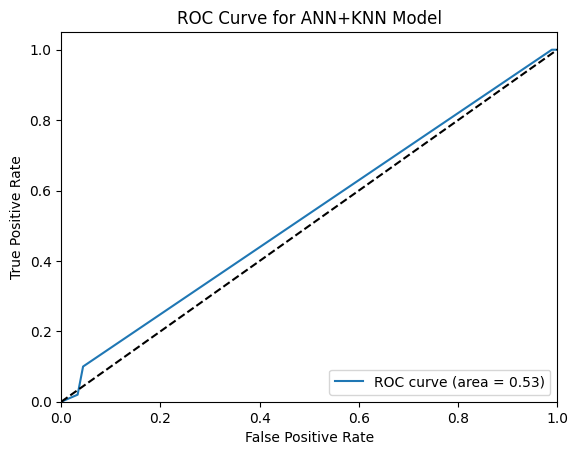

In [ ]:
# prompt: roc curve for ann+knn model with model name

from sklearn.metrics import roc_curve, auc

# Assuming 'best_knn' and 'X_test_encoded' are defined from the previous code
y_pred_proba = best_knn.predict_proba(X_test_encoded)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ANN+KNN Model')
plt.legend(loc="lower right")
plt.show()

# Stacked Model (Random Forest + XGBoost + ANN)

In [ ]:
# Base Models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

In [ ]:
# Stack Model Predictions (5-fold cross-validation on training set)
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds)
meta_features_train = np.zeros((X_train.shape[0], 2))  # Store predictions from RF and XGBoost for each fold

for i, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    print(f"Training Fold {i+1}/{n_folds}")

  # Train Random Forest and XGBoost on each fold and store predictions
    # Use .iloc to select rows using integer indices
    rf.fit(X_train.iloc[train_idx], y_train[train_idx])
    xgb.fit(X_train.iloc[train_idx], y_train[train_idx])

    # Generate predictions and store them as meta features
    # Use .iloc to select rows for predictions as well
    meta_features_train[val_idx, 0] = rf.predict(X_train.iloc[val_idx])
    meta_features_train[val_idx, 1] = xgb.predict(X_train.iloc[val_idx])

# Train the meta-model (ANN) on the combined base model predictions
meta_model = Sequential([
    Input(shape=(2,)),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

Training Fold 1/5
Training Fold 2/5
Training Fold 3/5
Training Fold 4/5
Training Fold 5/5


In [ ]:
# Compile and train the ANN as the meta-model
meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
meta_model.fit(meta_features_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1155 - loss: 0.7306
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5071 - loss: 0.6711
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7672 - loss: 0.6233
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9400 - loss: 0.5710
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9299 - loss: 0.5180
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9312 - loss: 0.4721
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9383 - loss: 0.4022
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9404 - loss: 0.3500
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9419 - loss: 0.3010
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9388 - loss: 0.2796
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9423 - loss: 0.2439
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9393 - lo

In [ ]:
# Final Meta-Feature Generation on the Test Set for Evaluation
rf_test_preds = rf.predict(X_test)
xgb_test_preds = xgb.predict(X_test)
meta_features_test = np.column_stack((rf_test_preds, xgb_test_preds))

In [ ]:
# Predict with ANN as the meta-model
final_predictions = (meta_model.predict(meta_features_test) > 0.5).astype(int).flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
# Evaluate the performance
accuracy = accuracy_score(y_test, final_predictions)
conf_matrix = confusion_matrix(y_test, final_predictions)
class_report = classification_report(y_test, final_predictions)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)

Confusion Matrix:
 [[89  2]
 [ 2 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        91
           1       0.96      0.96      0.96        50

    accuracy                           0.97       141
   macro avg       0.97      0.97      0.97       141
weighted avg       0.97      0.97      0.97       141


Accuracy: 0.9716312056737588


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


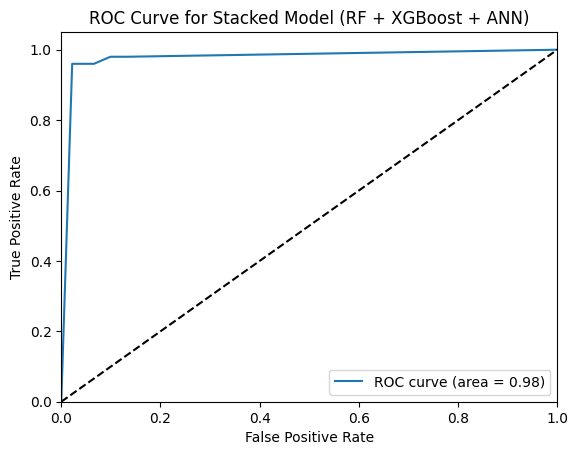

In [ ]:
# prompt: roc curve for the stacked model with model name

from sklearn.metrics import roc_curve, auc

# Assuming 'meta_model', 'meta_features_test', and 'y_test' are defined from the previous code
y_pred_proba = meta_model.predict(meta_features_test).flatten()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacked Model (RF + XGBoost + ANN)')
plt.legend(loc="lower right")
plt.show()

# CNN

In [ ]:
# Reshape data for CNN input (batch_size, timesteps, features)
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

In [ ]:
# 1. Increase model complexity
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)), # More filters, kernel_size 3
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'), # Additional dense layer
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy']) # Reduced LR


In [ ]:
# Train the model
history = cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_data=(X_test_cnn, y_test), verbose=2) # Increased epochs

Epoch 1/100
27/27 - 3s - 93ms/step - accuracy: 0.5107 - loss: 3.7325 - val_accuracy: 0.6454 - val_loss: 0.7941
Epoch 2/100
27/27 - 1s - 35ms/step - accuracy: 0.5249 - loss: 2.1221 - val_accuracy: 0.6454 - val_loss: 0.7456
Epoch 3/100
27/27 - 1s - 23ms/step - accuracy: 0.4727 - loss: 1.5637 - val_accuracy: 0.5674 - val_loss: 0.6696
Epoch 4/100
27/27 - 0s - 12ms/step - accuracy: 0.4976 - loss: 1.2549 - val_accuracy: 0.6525 - val_loss: 0.6565
Epoch 5/100
27/27 - 1s - 19ms/step - accuracy: 0.5201 - loss: 1.0154 - val_accuracy: 0.6170 - val_loss: 0.6740
Epoch 6/100
27/27 - 0s - 7ms/step - accuracy: 0.5107 - loss: 0.9174 - val_accuracy: 0.5603 - val_loss: 0.6917
Epoch 7/100
27/27 - 0s - 11ms/step - accuracy: 0.5332 - loss: 0.8283 - val_accuracy: 0.4539 - val_loss: 0.7007
Epoch 8/100
27/27 - 0s - 7ms/step - accuracy: 0.4976 - loss: 0.8161 - val_accuracy: 0.3688 - val_loss: 0.7055
Epoch 9/100
27/27 - 0s - 8ms/step - accuracy: 0.4964 - loss: 0.7716 - val_accuracy: 0.3688 - val_loss: 0.7160
Epoc

In [ ]:
# prompt: show the  accuracy, precision, f1-score recall of my cnn model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'cnn_model' and 'X_test_cnn' are defined from the previous code
y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred_cnn)
precision = precision_score(y_test, y_pred_cnn)
recall = recall_score(y_test, y_pred_cnn)
f1 = f1_score(y_test, y_pred_cnn)

print(f"CNN Model Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
CNN Model Performance:
Accuracy: 0.9361702127659575
Precision: 0.8867924528301887
Recall: 0.94
F1-score: 0.912621359223301


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9323 - loss: 0.1729 
Test Accuracy: 0.9362


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


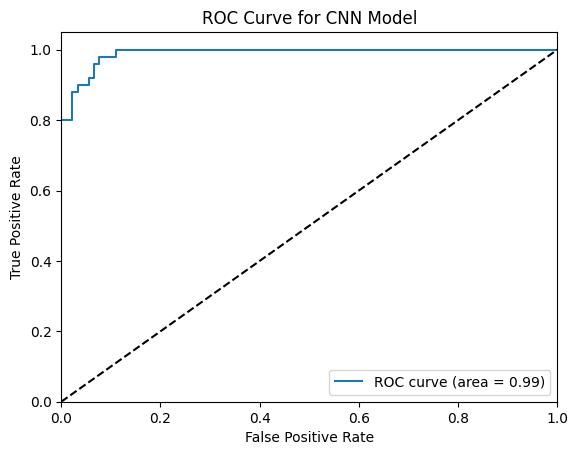

In [ ]:
# prompt: roc curve for the cnn model with model name

from sklearn.metrics import roc_curve, auc

# Assuming 'cnn_model' and 'X_test_cnn' are defined from the previous code
y_pred_proba = cnn_model.predict(X_test_cnn).flatten()

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN Model')
plt.legend(loc="lower right")
plt.show()

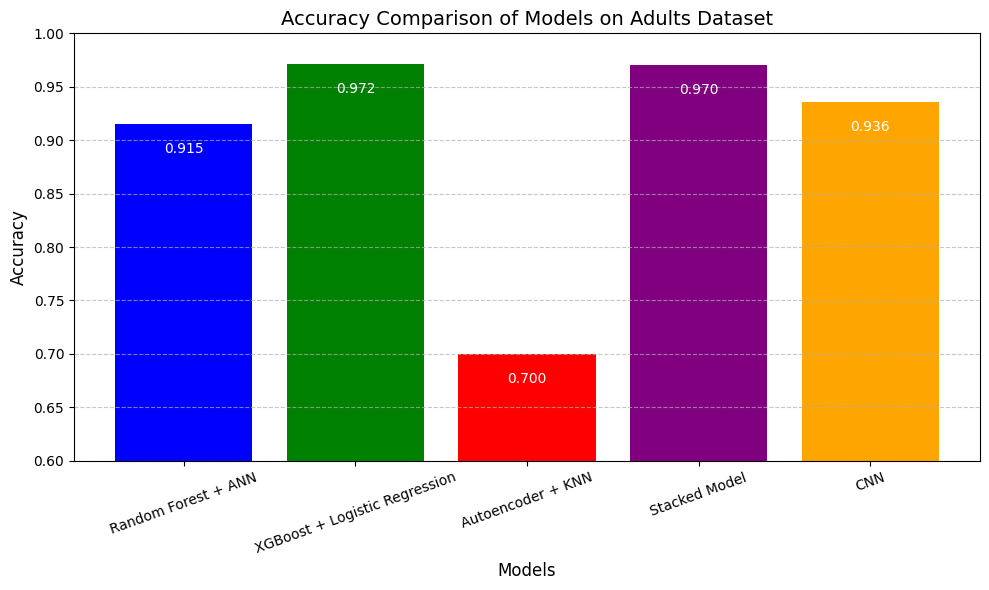

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = [
    "Random Forest + ANN",
    "XGBoost + Logistic Regression",
    "Autoencoder + KNN",
    "Stacked Model",
    "CNN"
]
accuracies = [0.914894, 0.971631, 0.7, 0.97, 0.9361702127659575]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])

# Annotating accuracy values
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.03,
             f'{accuracy:.3f}', ha='center', va='bottom', fontsize=10, color='white')

# Add labels, title, and grid
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Accuracy Comparison of Models on Adults Dataset", fontsize=14)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.6, 1.0)

# Display plot
plt.tight_layout()
plt.show()

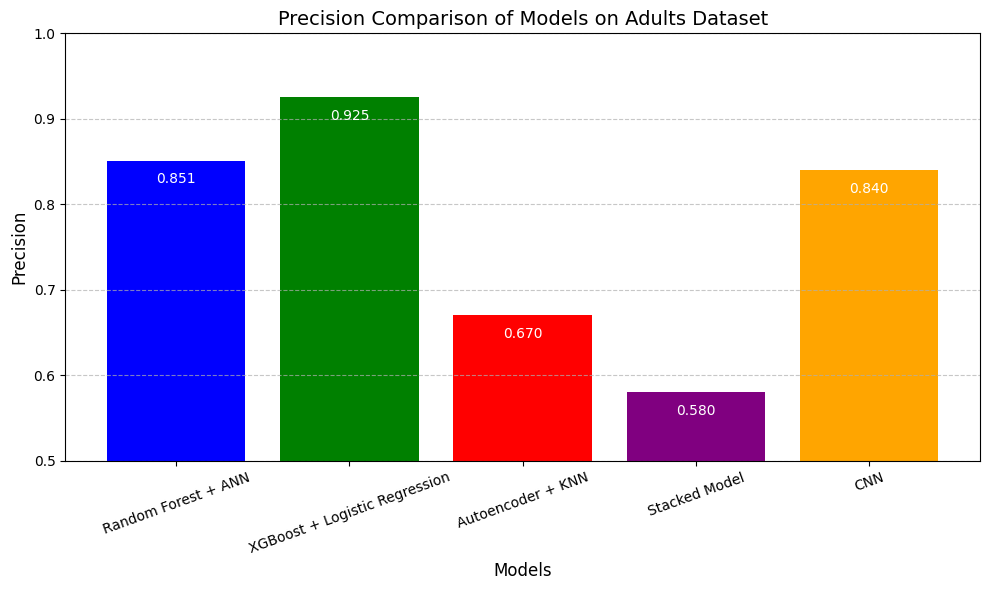

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = [
    "Random Forest + ANN",
    "XGBoost + Logistic Regression",
    "Autoencoder + KNN",
    "Stacked Model",
    "CNN"
]
precisions = [0.851, 0.925, 0.67, 0.58, 0.84]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(models, precisions, color=['blue', 'green', 'red', 'purple', 'orange'])

# Annotating precision values
for bar, precision in zip(bars, precisions):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.03,
             f'{precision:.3f}', ha='center', va='bottom', fontsize=10, color='white')

# Add labels, title, and grid
plt.xlabel("Models", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision Comparison of Models on Adults Dataset", fontsize=14)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.5, 1.0)

# Display plot
plt.tight_layout()
plt.show()

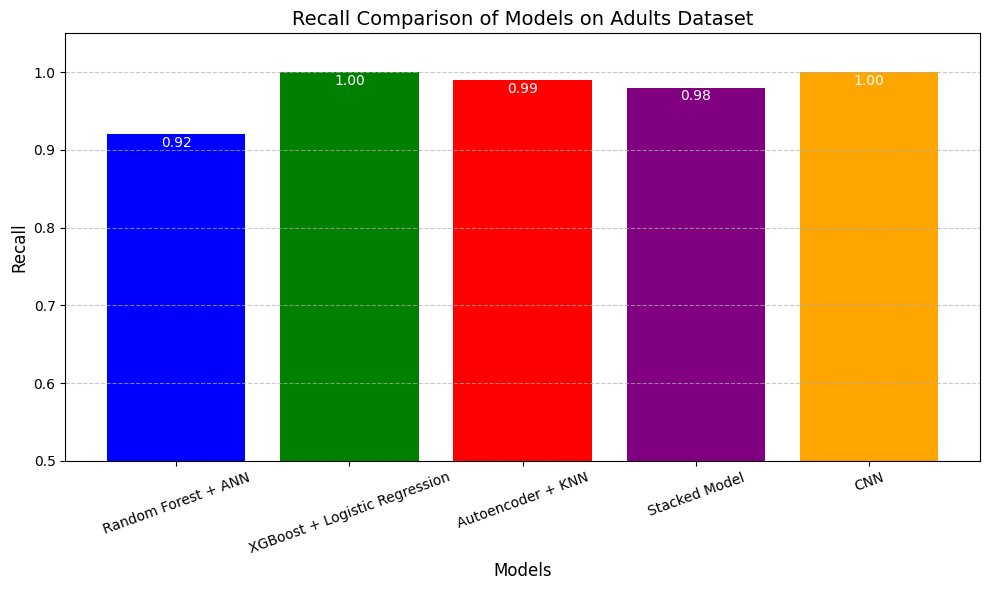

In [ ]:
# Data for Recall
recall_values = [0.92, 1, 0.99, 0.98, 1]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(models, recall_values, color=['blue', 'green', 'red', 'purple', 'orange'])

# Annotating recall values
for bar, recall in zip(bars, recall_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.02,
             f'{recall:.2f}', ha='center', va='bottom', fontsize=10, color='white')

# Add labels, title, and grid
plt.xlabel("Models", fontsize=12)
plt.ylabel("Recall", fontsize=12)
plt.title("Recall Comparison of Models on Adults Dataset", fontsize=14)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.5, 1.05)

# Display plot
plt.tight_layout()
plt.show()


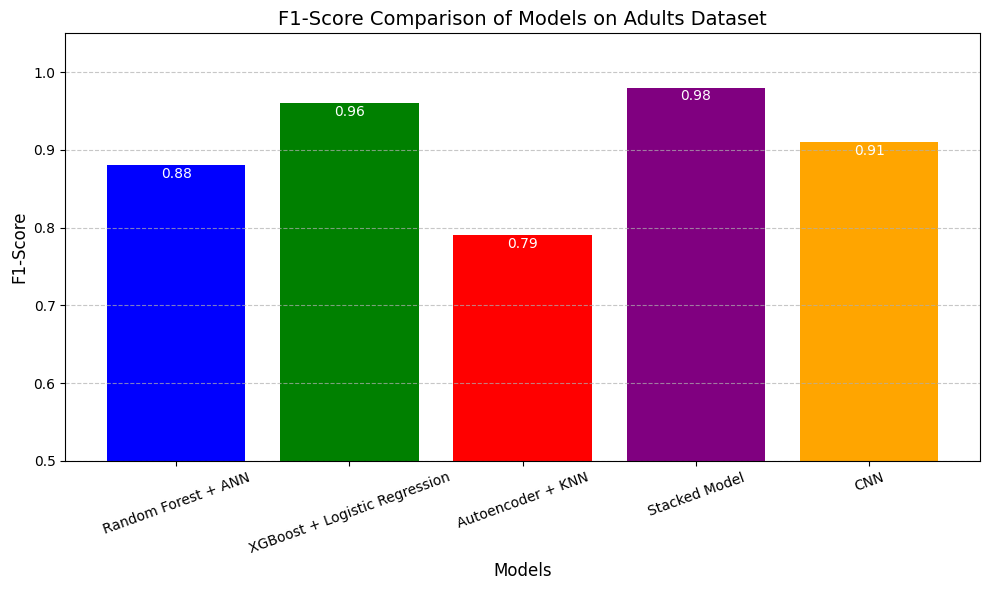

In [ ]:
# Data for F1-scores
f1_scores = [0.88, 0.96, 0.79, 0.98, 0.91]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(models, f1_scores, color=['blue', 'green', 'red', 'purple', 'orange'])

# Annotating F1-scores
for bar, f1 in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.02,
             f'{f1:.2f}', ha='center', va='bottom', fontsize=10, color='white')

# Add labels, title, and grid
plt.xlabel("Models", fontsize=12)
plt.ylabel("F1-Score", fontsize=12)
plt.title("F1-Score Comparison of Models on Adults Dataset", fontsize=14)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.5, 1.05)

# Display plot
plt.tight_layout()
plt.show()

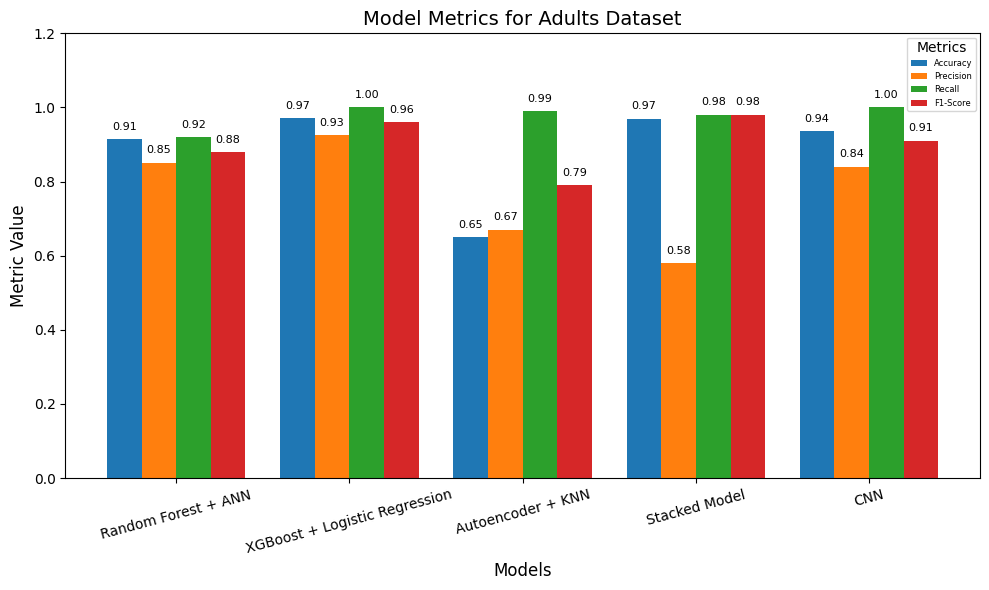

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
models = ['Random Forest + ANN', 'XGBoost + Logistic Regression', 'Autoencoder + KNN', 'Stacked Model', 'CNN']
metrics = {
    'Accuracy': [0.914894, 0.971631, 0.65, 0.97, 0.936170],
    'Precision': [0.851, 0.925, 0.67, 0.58, 0.84],
    'Recall': [0.92, 1, 0.99, 0.98, 1],
    'F1-Score': [0.88, 0.96, 0.79, 0.98, 0.91]
}

# Convert metrics to a numpy array for plotting
metric_values = np.array(list(metrics.values()))
metric_names = list(metrics.keys())

# Plot setup
x = np.arange(len(models))  # Label locations
width = 0.2  # Width of each bar

plt.figure(figsize=(10, 6))  # Adjust size

# Plot bars for each metric
for i, (metric_name, values) in enumerate(metrics.items()):
    plt.bar(x + i * width - (1.5 * width), values, width, label=metric_name)

# Adding labels and titles
plt.xticks(x, models, rotation=15, fontsize=10)
plt.title('Model Metrics for Adults Dataset', fontsize=14)
plt.ylabel('Metric Value', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, 1.2)  # Adjust y-axis for clarity
plt.legend(title='Metrics', fontsize=6)
plt.tight_layout()

# Annotate bars with values
for i, values in enumerate(metric_values):
    for j, value in enumerate(values):
        plt.text(x[j] + i * width - (1.5 * width), value + 0.02, f'{value:.2f}',
                 ha='center', va='bottom', fontsize=8)

# Show the plot
plt.show()